# Import libraries 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

**features of the data**

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
features = ['latitude','longitude','price','minimum_nights',
'number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

**clean the data**

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

**Look at the price variable. Does it have a long tail?**

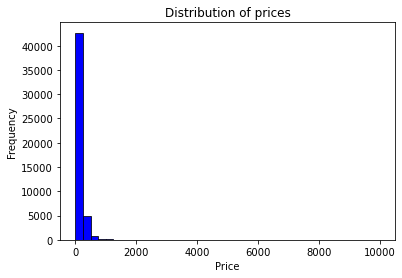

In [6]:
sns.histplot(df.price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

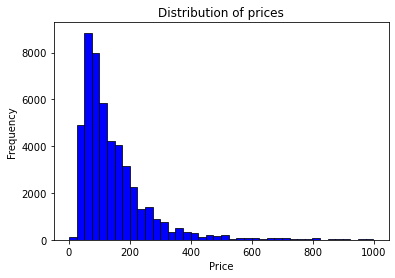

In [7]:
sns.histplot(df.price[df.price < 1000], bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

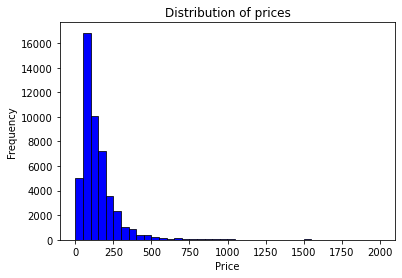

In [8]:
sns.histplot(df.price[df.price < 2000], bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

As we can see the price does have a long tail 

**so we will use log + 1 to eleminate the tail**

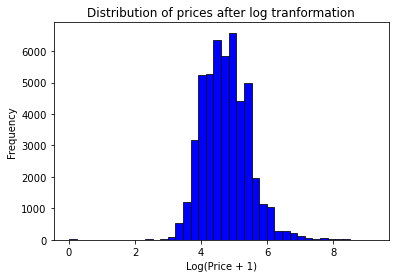

In [9]:
log_price = np.log1p(df.price)
sns.histplot(log_price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

# Question 1
**Find a feature with missing values. How many missing values does it have?**

In [10]:
df[features].isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df['reviews_per_month'].isnull().sum()

10052

**The answer is 10052**

# Question 2
**What's the median (50% percentile) for variable 'minimum_nights'?**

In [12]:
median_minimum_nights = df['minimum_nights'].median()
median_minimum_nights

3.0

**The answer is 3.0**

# Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

Shuffling the initial dataset with seed 42

In [13]:
df_shuffled = df
n = len(df_shuffled)

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)


df_shuffled = df_shuffled.iloc[idx]

In [14]:
df_shuffled

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,come_and_go_as__you_please_in_bkln!,1631733,jane,brooklyn,kensington,40.64354,-73.97777,entire_home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"spacious,_sunny_room_in_queens/brooklyn",913940,giancarlo,queens,ridgewood,40.70666,-73.90779,private_room,30,21,0,NaN,NaN,1,73
15394,12342297,private_bedroom_in_high-ceiling_4br_apartment!,19953913,alejandro,manhattan,hell's_kitchen,40.76116,-73.99016,private_room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,sonder_|_stock_exchange_|_stunning_3br_+_kitchen,219517861,sonder_(nyc),manhattan,financial_district,40.70763,-74.01050,entire_home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,spacious_2_bedroom_with_balcony,16110448,gingie,manhattan,east_harlem,40.79658,-73.93287,entire_home/apt,199,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8754339,gran_fondo_cyclist_haven,20261309,sarah,manhattan,washington_heights,40.84650,-73.94319,shared_room,60,1,0,NaN,NaN,1,0
44732,34383329,"a_private_bedroom_in_chelsea_,_manhattan.",53254710,aamito,manhattan,chelsea,40.73957,-74.00082,private_room,85,2,4,2019-06-30,1.90,1,76
38158,30109697,nicely_appointed_big_one_bedroom_off_central_park,1385157,brian,manhattan,upper_west_side,40.78318,-73.97372,entire_home/apt,130,30,1,2019-04-12,0.34,5,261
860,304799,penthouse_studio_by_central_park,185753,carolyn,manhattan,upper_west_side,40.77508,-73.97990,entire_home/apt,150,2,11,2019-06-09,0.13,1,2


* Splitting the dataset
* Deleting the price
* Applying the log1p

In [15]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

<AxesSubplot:ylabel='Count'>

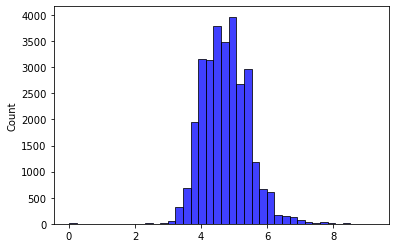

In [16]:
sns.histplot(y_train, bins=40,color='blue')

# Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?.

The code from lessons for training the model

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def prepare_X(df , to_fill_with):
    df_num = df[base]
    df_num = df_num.fillna(to_fill_with)
    X = df_num.values
    return X

def rmse(y , y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
base = ['latitude','longitude','minimum_nights',
'number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

* First we will try to train the model with filling the missing values with 0

In [19]:
X_train = prepare_X(df_train , 0)
w0 , w = train_linear_regression(X_train , y_train)
w0 , w

(-419.9126602782961,
 array([ 1.30676226e+00, -5.02167857e+00, -5.59803112e-04, -4.07634897e-04,
        -8.25470057e-03,  1.33371319e-03,  6.50203891e-04]))

* Using the validation dataset to evaluate the model and computes RMSE

In [20]:
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

In [21]:
score = rmse(y_val , y_pred)
round(score , 2)

0.64

* So the RMSE = 0.64 when we fill the missing values with 0

* Now let us compute the mean of the missing using the train dataset

In [22]:
mean = df_train['reviews_per_month'].mean()
mean

1.3685492094777056

* Now let us repeat the same process but filling the missing values with mean

In [23]:
X_train = prepare_X(df_train , mean)
w0 , w = train_linear_regression(X_train , y_train)

X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val , y_pred)
round(score , 2)

0.64

* So The RMSE = 0.64 which is the same as before and there is no difference filling the missing with mean or 0

<AxesSubplot:ylabel='Count'>

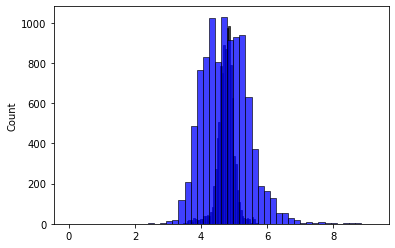

In [24]:
sns.histplot(y_pred, color = 'black'  ,bins = 50)
sns.histplot(y_val, color = 'blue' , bins = 50)

# Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [24]:
#first implementing linear regression regularized version
def train_linear_regression_reg(X, y ,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + (r*np.eye(XTX.shape[0]))
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train , 0)
    w0 , w = train_linear_regression_reg(X_train , y_train , r)

    X_val = prepare_X(df_val , 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val , y_pred)
    round(score , 2)
    print('%6s' %r ,w0 ,round(score,2))

     0 -419.9126602782961 0.64
 1e-06 -419.8627175018098 0.64
0.0001 -414.97649420185604 0.64
 0.001 -375.2736539367924 0.64
  0.01 -191.78384091255427 0.66
   0.1 -32.56256056402253 0.68
     1 -3.4992168400821244 0.68
     5 -0.7033623161458142 0.68
    10 -0.35127675971367145 0.68


**now we can see that the best value for r = 0.001 because it gives us the smallest RMSE**

# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

**first creating an empty array to append values to it**

In [32]:
arr = []

In [33]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_shuffled = df
    n = len(df_shuffled)

    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)


    df_shuffled = df_shuffled.iloc[idx]
    
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train+n_val]
    df_test = df_shuffled.iloc[n_train+n_val:]

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train , 0)
    w0 , w = train_linear_regression(X_train , y_train)

    X_val = prepare_X(df_val , 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val , y_pred)
    arr.append(round(score , 2))

In [34]:
arr

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

**Finding standard deviation of all the scores**

In [35]:
round(np.std(arr),3)

0.008

**The standard deviation = 0.008**

# Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with r=0.001.
* What's the RMSE on the test dataset?

In [36]:
    #splitting the data with seed 9
    np.random.seed(9)
    df_shuffled =df
    n = len(df_shuffled)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_shuffled.iloc[idx[0:n]]
    df_shuffled
    
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train+n_val]
    df_test = df_shuffled.iloc[n_train+n_val:]

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    #combinig the train and valadation datasets into one
    df_full_train = pd.concat([df_train , df_val])
    df_full_train = df_full_train.reset_index(drop = True)
    
    y_full_train = np.log1p(df_full_train.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    del df_full_train ['price']

**training the model with full_train**

In [37]:
r = 0.001
X_full_train = prepare_X(df_full_train , 0)
w0 , w = train_linear_regression_reg(X_full_train , y_full_train , r)

**rmse on the test dataset**

In [38]:
X_test = prepare_X(df_test , 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test , y_pred)
score

0.6452771348323516

In [39]:
round(score , 2)

0.65

**The RMSE = 0.65**